<a href="https://colab.research.google.com/github/LsavageSport/LsavageSport/blob/main/home-corner-advantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mkdir -p data figs
pip install -q pandas numpy scipy matplotlib

In [2]:
curl -L -o data/E0.csv https://www.football-data.co.uk/mmz4281/2324/E0.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  168k  100  168k    0     0   125k      0  0:00:01  0:00:01 --:--:--  125k


In [3]:
import pandas as pd, numpy as np, scipy.stats as ss, matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/E0.csv', usecols=['HC','AC']).dropna()

home_mean = df.HC.mean()
away_mean = df.AC.mean()

t, p = ss.ttest_ind(df.HC, df.AC, equal_var=False)

d  = (home_mean - away_mean) / np.sqrt(((df.HC.var(ddof=1)+df.AC.var(ddof=1))/2))

print(f'Home μ = {home_mean:.2f} | Away μ = {away_mean:.2f}')
print(f'Welch t = {t:.2f}  |  p = {p:.3g}')
print(f'Cohen d = {d:.2f}')

Home μ = 6.12 | Away μ = 4.71
Welch t = 6.34  |  p = 4.03e-10
Cohen d = 0.46


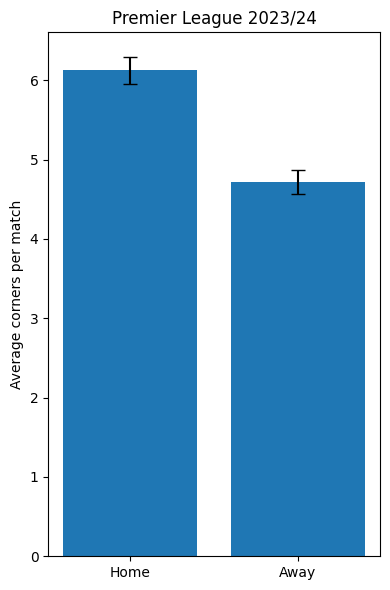

In [5]:
plt.figure(figsize=(4,6))
plt.bar(['Home','Away'], [home_mean, away_mean],
        yerr=[df.HC.sem(), df.AC.sem()], capsize=5)
plt.ylabel('Average corners per match')
plt.title('Premier League 2023/24')
plt.tight_layout()
plt.savefig('figs/home_vs_away_corners.png', dpi=300)
plt.show()